In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
with open("../../datasets/alcohol/estimated_numbers.csv","r") as file:
    content= file.readlines()
    print(content)

['Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region\n', 'Afghanistan, 2017,630308[495000-801000],298[110-510],630308,495000,801000,298,110,510,Eastern Mediterranean\n', 'Algeria, 2017,0,0,0,,,0,,,Africa\n', 'Angola, 2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000,6661000,13316,9970,16600,Africa\n', 'Argentina, 2017,0,0,0,,,0,,,Americas\n', 'Armenia, 2017,0,0,0,,,0,,,Europe\n', 'Azerbaijan, 2017,0,0,0,,,0,,,Europe\n', 'Bangladesh, 2017,32924[30000-36000],76[3-130],32924,30000,36000,76,3,130,South-East Asia\n', 'Belize, 2017,7,0,7,,,0,,,Americas\n', 'Benin, 2017,4111699[2774000-6552000],7328[5740-8920],4111699,2774000,6552000,7328,5740,8920,Africa\n', 'Bhutan, 2017,11,0,11,,,0,,,South-East Asia\n', 'Bolivia (Plurinational State of), 2017,6512[4900-8300],2[0-4],6512,4900,8300,2,0,4,Americas\n', 'Botswana, 2017,2989[2300-4200],7[0-20],2989,2300,4200,7,0,20,Africa\

In [16]:
for row in content:
    print(row.split(",")[2].split("[")[0])
#     for item in row.split(","):
#         print(item)

No. of cases
630308
0
4615605
0
0
0
32924
7
4111699
11
6512
2989
217928
7907562
2113066
423
208273
7307515
1804550
2779489
0
80357
3230
1039706
12
3373486
2184
25021891
15265
405
1275
0
0
435143
115928
724
2666954
341980
119044
0
7805045
4739
4282165
107972
24913
32011
1695
9590000
1530566
60
0
0
3520384
0
20712
911333
2324289
4303543
85
7160192
238272
736
0
10025823
116772
89611
3829
13711
7702777
53667565
0
956280
808
1500657
0
70745
15253
436
6172220
2239
177
1024285
2869588
103482
541768
22517
1781704
0
1517910
40
0
0
11043
36
2891868
0
0
8600724
0
6477825
0
2270
519109
5481
762995
3475522
1239430
614491
0
4485050
0
0
0
31169
4
4007210
15
7894
1150
133591
7675183
2053294
48
127552
7176158
1780632
2689908
3
115125
1143
1030697
4
3319810
2719
24454696
13804
896
1191
0
12
427357
86561
350
2927266
334796
253981
0
7652909
6120
4197876
105441
22108
35105
5934
12630000
1293337
81
0
0
3452117
0
28152
898524
1692049
4223467
266
6902717
298498
551
0
9753050
262577
41608
2754
7854
7457829
523

In [17]:
with open("../../datasets/alcohol/reported_numbers.csv","r") as file:
    content= file.readlines()


In [19]:
cases=[]
countries=[]
for case in content[1:]:
    try:
        countries.append(case.split(",")[0])
        cases.append(round(float(case.split(",")[2])))
        
    except ValueError:
        cases.append(0)
#         country.append(case[0])
cases= np.array(cases)
countries= np.array(countries)


##  Outliers

In [22]:
mean=cases.mean()

In [23]:
std=cases.std()

In [24]:
mean>std

False

In [56]:
x=np.random.randint(10,20,15)

In [57]:
x.mean()

13.8

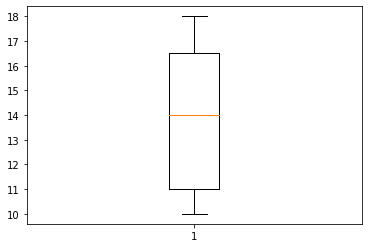

In [59]:
plt.boxplot(x);

In [27]:
x.std()

2.8252826800556123

In [66]:
x[13]=70

In [29]:
x

array([ 15,  12,  11,  13,  10,  15,  11,  19,  11,  18,  14,  14,  16,
       300,  19])

In [64]:
x.mean()

19.466666666666665

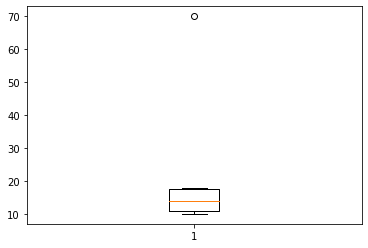

In [67]:
plt.boxplot(x);

In [31]:
x.std()

71.36124064691327

In [33]:
z=(x-x.mean())/x.std()

In [39]:
(np.abs(z)<=3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [40]:
~(np.abs(z)<=3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [41]:
x[~(np.abs(z)<=3)]##. masking

array([300])

In [42]:
x[(np.abs(z)<=3)]##. masking

array([15, 12, 11, 13, 10, 15, 11, 19, 11, 18, 14, 14, 16, 19])

In [43]:
x[2]=200

In [44]:
z=(x-x.mean())/x.std()

In [45]:
(np.abs(z)<=3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [46]:
z

array([-0.37472951, -0.41122914,  1.87608086, -0.3990626 , -0.43556222,
       -0.37472951, -0.42339568, -0.32606334, -0.42339568, -0.33822988,
       -0.38689605, -0.38689605, -0.36256297,  3.09273512, -0.32606334])

In [47]:
x

array([ 15,  12, 200,  13,  10,  15,  11,  19,  11,  18,  14,  14,  16,
       300,  19])

In [48]:
x[4]=301

In [49]:
x

array([ 15,  12, 200,  13, 301,  15,  11,  19,  11,  18,  14,  14,  16,
       300,  19])

In [50]:
z=(x-x.mean())/x.std()

In [51]:
z

array([-0.48676817, -0.51585791,  1.3070986 , -0.50616133,  2.2864529 ,
       -0.48676817, -0.52555448, -0.44798186, -0.52555448, -0.45767844,
       -0.49646475, -0.49646475, -0.4770716 ,  2.27675632, -0.44798186])

In [52]:
(np.abs(z)<=3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

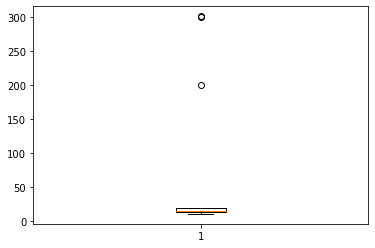

In [55]:
plt.boxplot(x);

## Histogram

In [68]:
ages= np.random.randint(16,70,15)

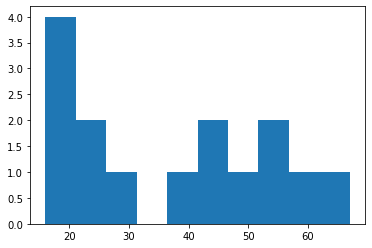

In [70]:
plt.hist(ages);

(array([4., 2., 1., 0., 1., 2., 1., 2., 1., 1.]),
 array([16. , 21.1, 26.2, 31.3, 36.4, 41.5, 46.6, 51.7, 56.8, 61.9, 67. ]),
 <BarContainer object of 10 artists>)

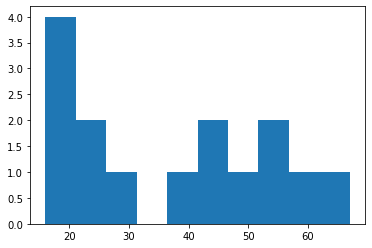

In [71]:
plt.hist(ages)

(array([7., 1., 4., 3.]),
 array([16.  , 28.75, 41.5 , 54.25, 67.  ]),
 <BarContainer object of 4 artists>)

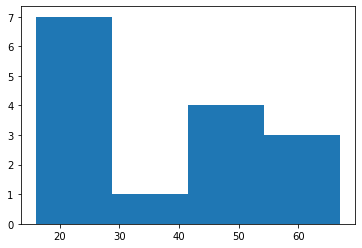

In [72]:
plt.hist(ages,bins=4)

(array([3., 3., 2., 5., 2.]),
 array([16, 20, 25, 40, 60, 75]),
 <BarContainer object of 5 artists>)

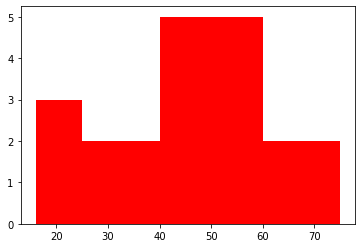

In [74]:
plt.hist(ages,bins=[16,20,25,40,60,75],color="r")

(array([3., 3., 2., 5., 2.]),
 array([16, 20, 25, 40, 60, 75]),
 <BarContainer object of 5 artists>)

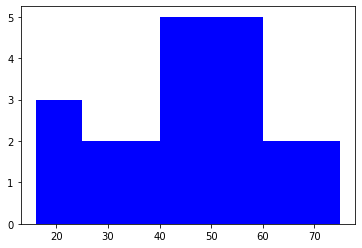

In [75]:
plt.hist(ages,bins=[16,20,25,40,60,75],color="b")

(array([3., 3., 2., 5., 2.]),
 array([16, 20, 25, 40, 60, 75]),
 <BarContainer object of 5 artists>)

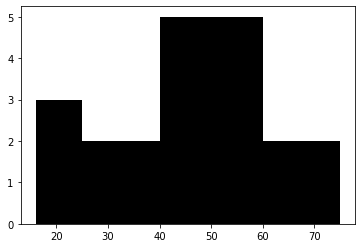

In [76]:
plt.hist(ages,bins=[16,20,25,40,60,75],color="k")

(array([3., 3., 2., 5., 2.]),
 array([16, 20, 25, 40, 60, 75]),
 <BarContainer object of 5 artists>)

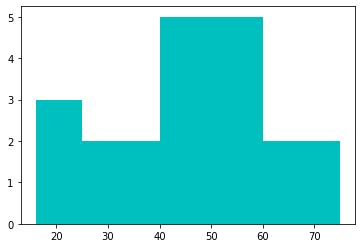

In [77]:
plt.hist(ages,bins=[16,20,25,40,60,75],color="c")

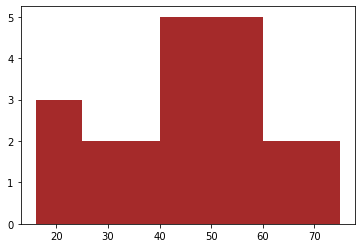

In [79]:
plt.hist(ages,bins=[16,20,25,40,60,75],color="brown");

## Multiple Charts on anaxis

In [80]:
ages=np.random.randint(20,40,5)
weights=np.random.randint(20,40,5)

<BarContainer object of 5 artists>

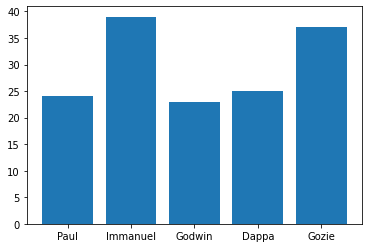

In [81]:
names=["Paul","Immanuel","Godwin","Dappa","Gozie"]
plt.bar(names,ages)

<BarContainer object of 5 artists>

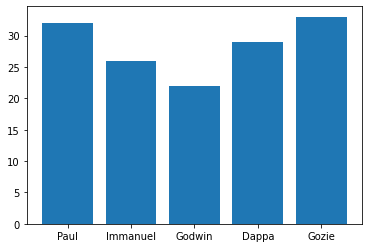

In [82]:
plt.bar(names,weights)

<BarContainer object of 5 artists>

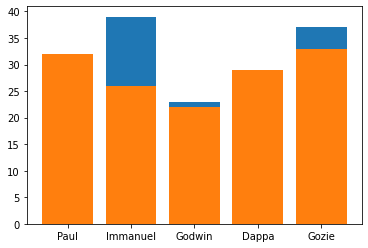

In [83]:
plt.bar(names,ages)
plt.bar(names,weights)

<BarContainer object of 5 artists>

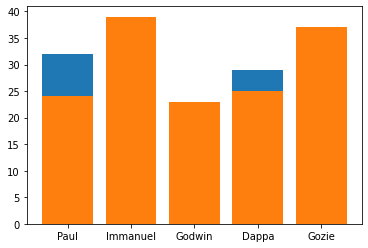

In [84]:

plt.bar(names,weights)
plt.bar(names,ages)

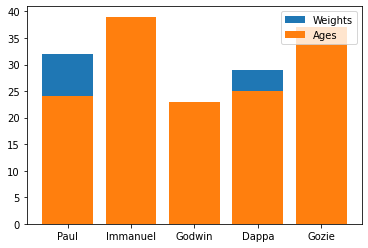

In [86]:
plt.bar(names,weights)
plt.bar(names,ages)
plt.legend(labels=["Weights","Ages"])

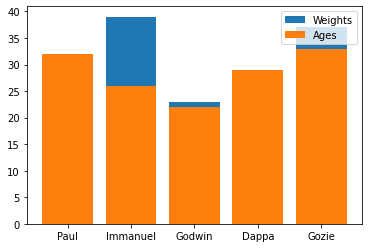

In [87]:
plt.bar(names,ages)
plt.bar(names,weights)

plt.legend(labels=["Weights","Ages"])
##. wrong

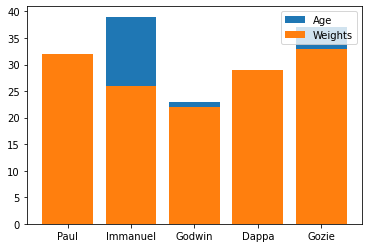

In [88]:
plt.bar(names,ages,label="Age")
plt.bar(names,weights,label="Weights")
plt.legend()

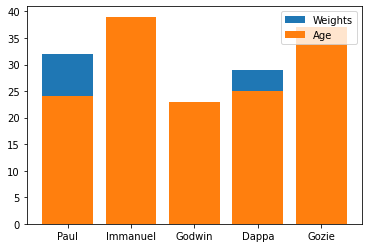

In [89]:

plt.bar(names,weights,label="Weights")
plt.bar(names,ages,label="Age")
plt.legend()

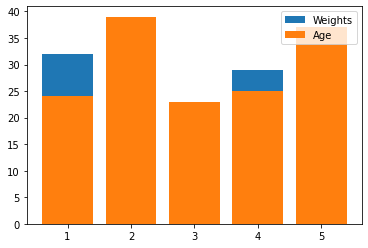

In [94]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights")
plt.bar(xticks,ages,label="Age")
plt.legend()

In [90]:
range(1,2.4)

TypeError: 'float' object cannot be interpreted as an integer

In [93]:
list(np.arange(1,2.4,0.5))

[1.0, 1.5, 2.0]

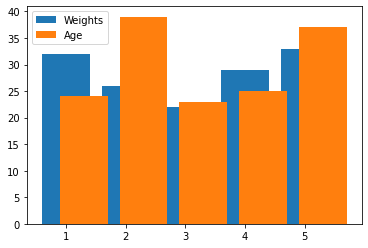

In [95]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights")
plt.bar(xticks+0.3,ages,label="Age")
plt.legend()

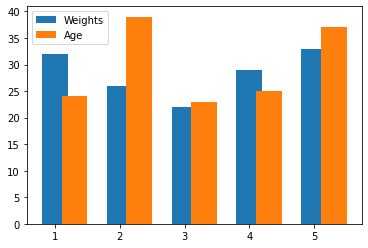

In [96]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights",width=0.4)
plt.bar(xticks+0.3,ages,label="Age",width=0.4)
plt.legend()

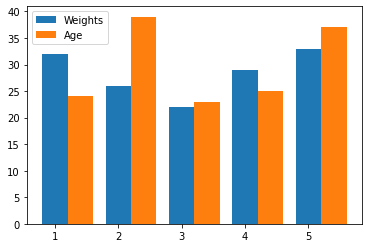

In [97]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights",width=0.4)
plt.bar(xticks+0.4,ages,label="Age",width=0.4)
plt.legend()

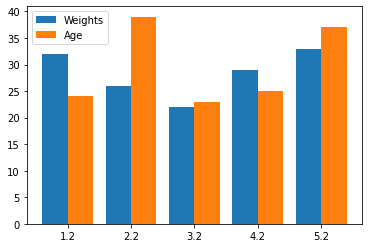

In [99]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights",width=0.4)
plt.bar(xticks+0.4,ages,label="Age",width=0.4)
plt.xticks(xticks+0.2)
plt.legend()

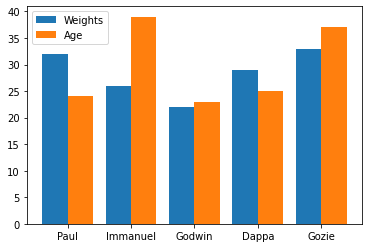

In [100]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights",width=0.4)
plt.bar(xticks+0.4,ages,label="Age",width=0.4)
plt.xticks(xticks+0.2,labels=names)
plt.legend()

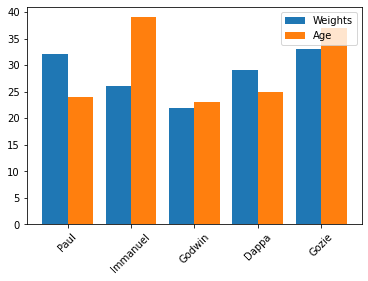

In [103]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights",width=0.4)
plt.bar(xticks+0.4,ages,label="Age",width=0.4)
plt.xticks(xticks+0.2,labels=names,rotation=45)
plt.legend(loc="upper right");

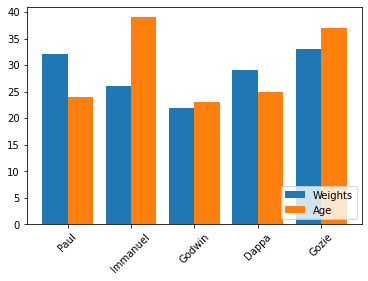

In [104]:
xticks=np.arange(1,6)
plt.bar(xticks,weights,label="Weights",width=0.4)
plt.bar(xticks+0.4,ages,label="Age",width=0.4)
plt.xticks(xticks+0.2,labels=names,rotation=45)
plt.legend(loc=4);

In [107]:
week1=np.random.randint(1,10,5)
week2=np.random.randint(1,10,5)
days=["Mon","Tues","Wed","Thur","fri"]

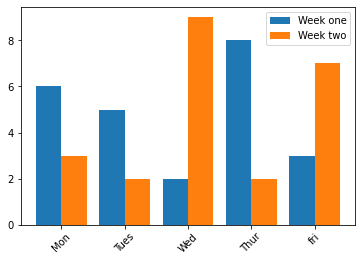

In [109]:
xticks=np.arange(1,6)
plt.bar(xticks,week1,label="Week one",width=0.4)
plt.bar(xticks+0.4,week2,label="Week two",width=0.4)
plt.xticks(xticks+0.2,labels=days,rotation=45)
plt.legend();

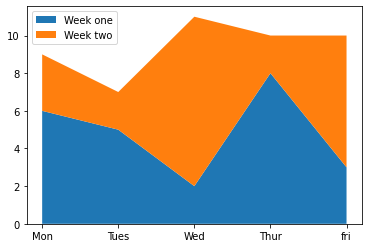

In [113]:
plt.stackplot(days,week1,week2)
plt.legend(labels=["Week one","Week two"],loc="upper left")

In [115]:
img1=np.random.randint(0,255,(32,32))

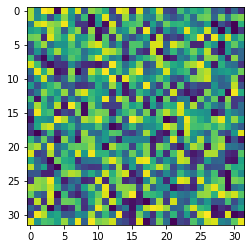

In [116]:
plt.imshow(img1)

In [117]:
img2=np.random.randint(0,255,(32,32,3))

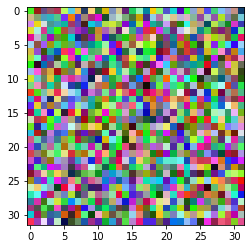

In [118]:
plt.imshow(img2)